# Gender gap
    
Based on https://public-paws.wmcloud.org/User:Miriam_(WMF)/queering-wp.ipynb

## Loading and preprocessing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = "https://analytics.wikimedia.org/published/datasets/knowledge_gaps/content_gaps/csv/gender.csv"
gendata = pd.read_csv(file)
# only wikipedia projects
gendata = gendata[gendata.wiki_db.str.endswith('wiki')]
gendata['gender3category']=[i if i in ['male','female'] else 'non-binary' for i in gendata['category']]

### First, Current snapshot as of today (gender)

In [2]:
gen3snapshot=gendata.groupby(['gender3category'])['article_created_value'].sum().reset_index()
gen3snapshot


gender3category  article_created_value
0          female                2407376
1            male                9964216
2      non-binary                  14171

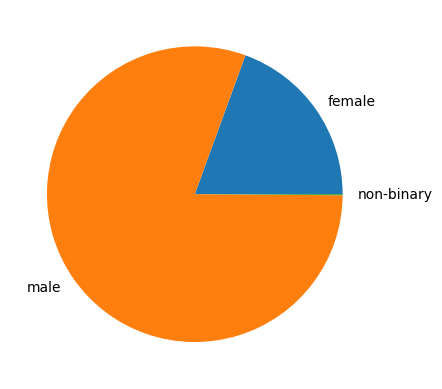

In [3]:
plt.pie(gen3snapshot['article_created_value'], labels = gen3snapshot['gender3category'])
plt.show()

In [4]:
gensnapshot=gendata[gendata.gender3category=='non-binary'].groupby(['category'])['article_created_value'].sum().reset_index()
gensnapshot.sort_values('article_created_value',ascending=False)

category  article_created_value
26        transgender female                   6400
22                non-binary                   3370
27          transgender male                   1332
12               genderfluid                    770
15                  intersex                    623
9                     eunuch                    587
13               genderqueer                    281
28        transgender person                    170
30                  travesti                     89
7             cisgender male                     88
1                    agender                     74
6           cisgender female                     65
31                two-spirit                     56
29            transmasculine                     48
5                   bigender                     41
0                   X-gender                     30
25             transfeminine                     25
3   assigned female at birth                     23
14                     hijra                     20
16                   kathoey                     18
20               neutral sex                     14
24              third gender                     11
10                fa'afafine                      9
4     assigned male at birth                      6
18                      muxe                      5
8                    demiboy                      5
11           female organism                      3
19                      māhū                      2
21                  neutrois                      2
23                 pangender                      2
17             male organism                      1
2                  akava'ine                      1

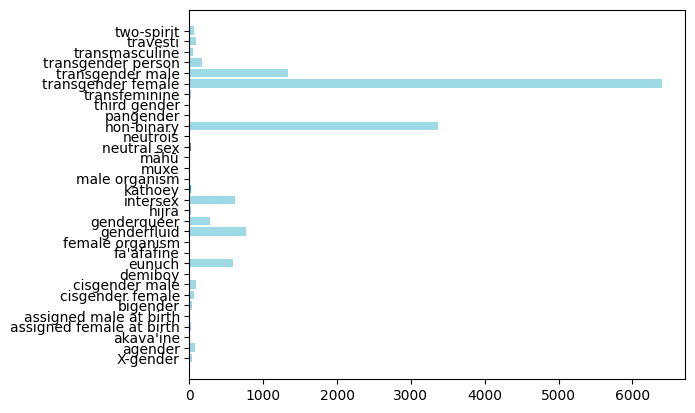

In [5]:
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.barh(y= gensnapshot['category'],width= np.array(gensnapshot['article_created_value']), color= plt.get_cmap("tab20")(gensnapshot['article_created_value']))
plt.show()

In [6]:
gendata.groupby(['gender3category'])['pageviews_mean_value'].mean()

gender3category
female         18.375358
male           14.774698
non-binary    114.210131
Name: pageviews_mean_value, dtype: float64

In [7]:
gendata[gendata.time_bucket=='2023-07'].groupby('gender3category')['quality_score_value'].mean()

gender3category
female        0.306629
male          0.292356
non-binary    0.369231
Name: quality_score_value, dtype: float64

## Now, over time (gender)

In [9]:
count={}
qual={}
pviews={}
for gender in gendata['category'].unique():
    count[gender]=gendata[gendata['category']==gender].groupby(['time_bucket'])['article_created_value'].sum()
    count[gender]=count[gender].cumsum()
    qual[gender]=gendata[gendata['category']==gender].groupby(['time_bucket'])['quality_score_value'].mean()
    pviews[gender]=gendata[gendata['category']==gender].groupby(['time_bucket'])['pageviews_mean_value'].mean()


In [11]:
#overtime quality articles
gen3quality=gendata.groupby(['gender3category','time_bucket'])['standard_quality_count_value'].sum().reset_index()
gen3quality

gender3category time_bucket  standard_quality_count_value
0            female     2001-01                             0
1            female     2001-02                             0
2            female     2001-03                             0
3            female     2001-04                             0
4            female     2001-05                             0
..              ...         ...                           ...
811      non-binary     2023-04                          3868
812      non-binary     2023-05                          3918
813      non-binary     2023-06                          3979
814      non-binary     2023-07                          4031
815      non-binary     2023-08                          3989

[816 rows x 3 columns]

<AxesSubplot: xlabel='time_bucket'>

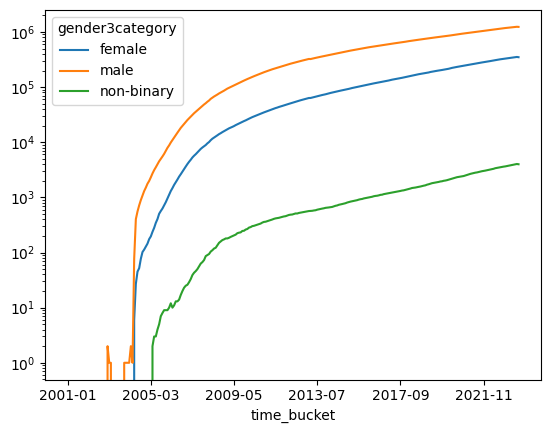

In [18]:
gen3quality.pivot(index='time_bucket',columns='gender3category', values='standard_quality_count_value').plot(logy=True)

<AxesSubplot: xlabel='time_bucket'>

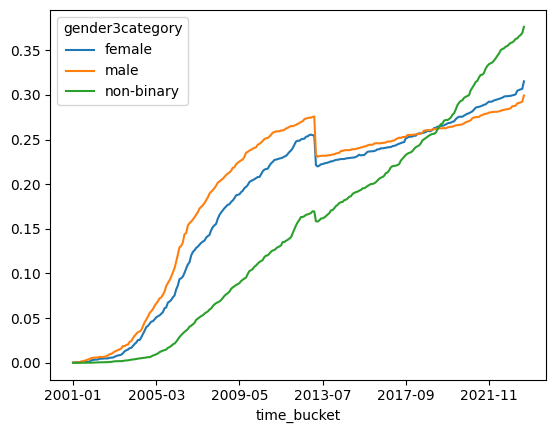

In [16]:
(gendata.groupby(['gender3category','time_bucket'])['quality_score_value'].mean().reset_index()
 .pivot(index='time_bucket',columns='gender3category', values='quality_score_value').plot())